In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
import re
import matplotlib.patches as patches
import matplotlib

In [2]:
data = pd.read_csv("Tarkari.csv", low_memory=False)
data.head()

,Commodity,Date,Unit,Minimum,Maximum,Average
0,Tomato Big(Nepali),6/16/2013,Kg,35,40,37.5
1,Tomato Small(Local),6/16/2013,Kg,26,32,29
2,Potato Red,6/16/2013,Kg,20,21,20.5
3,Potato White,6/16/2013,Kg,15,16,15.5
4,Onion Dry (Indian),6/16/2013,Kg,28,30,29


In [3]:
data['Date'] = pd.to_datetime(data['Date'])

In [4]:
pattern = r"^Rs\s+"
data["Minimum"] = pd.to_numeric(data["Minimum"].apply(lambda x: x if not str(x).startswith("Rs") else re.sub(pattern,"",str(x))))
data["Maximum"] = pd.to_numeric(data["Maximum"].apply(lambda x: x if not str(x).startswith("Rs") else re.sub(r"^Rs\s+", "",str(x))))
data["Average"] = pd.to_numeric(data["Average"].apply(lambda x: x if not str(x).startswith("Rs") else re.sub(r"^Rs\s+", "", str(x))))

In [5]:
selected_commodities = ['Onion Dry (Indian)', 'Tomato Big(Nepali)', 'Potato White', 'Carrot(Local)', 'Apple(Jholey)', 'Banana', 'Cucumber(Local)', 'Garlic Dry Nepali', 'Lettuce']
selected_data = data[data['Commodity'].isin(selected_commodities)].copy()

In [6]:
selected_data.head()

,Commodity,Date,Unit,Minimum,Maximum,Average
0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5
3,Potato White,2013-06-16,Kg,15.0,16.0,15.5
4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0
5,Carrot(Local),2013-06-16,Kg,30.0,35.0,32.5
40,Lettuce,2013-06-16,Kg,55.0,60.0,57.5


In [7]:
selected_data.loc[:, 'Season'] = selected_data['Date'].dt.month.map({1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'})

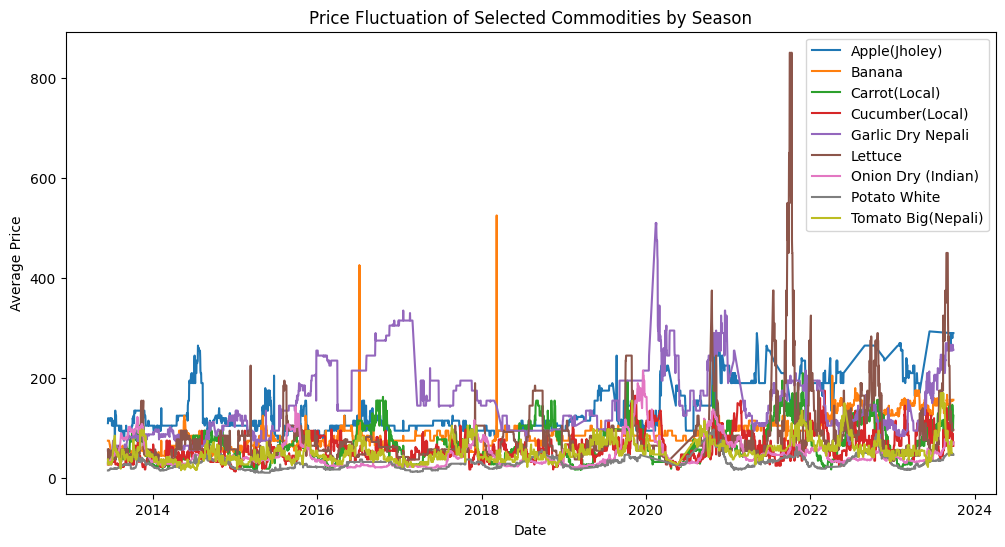

<Figure size 640x480 with 0 Axes>

In [8]:
plt.figure(figsize=(12, 6))
for commodity, commodity_data in selected_data.groupby('Commodity'):
    plt.plot(commodity_data['Date'], commodity_data['Average'], label=commodity)

plt.title('Price Fluctuation of Selected Commodities by Season')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.show()
plt.savefig('plt1.png')

In [42]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('features.csv')

# Convert 'Date' column to datetime if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter the data to show only data starting from 2019
filtered_data = df[df['Date'].dt.year >= 2019]

# Save the filtered data to a new CSV file
filtered_data.to_csv('filtered_features.csv', index=False)

In [43]:
filtered_data

,Commodity,Date,Unit,Minimum,Maximum,Average,day,month,year,Season_Fall,Season_Spring,Season_Summer,Season_Winter
16892,Tomato Big(Nepali),2019-01-01,Kg,45.0,50.0,47.50,1,1,2019,False,False,False,True
16893,Potato White,2019-01-01,Kg,20.0,25.0,22.50,1,1,2019,False,False,False,True
16894,Onion Dry (Indian),2019-01-01,Kg,26.0,28.0,27.00,1,1,2019,False,False,False,True
16895,Carrot(Local),2019-01-01,Kg,55.0,60.0,57.50,1,1,2019,False,False,False,True
16896,Lettuce,2019-01-01,Kg,90.0,100.0,95.00,1,1,2019,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30386,Cucumber(Local),2023-09-28,KG,60.0,70.0,65.00,28,9,2023,True,False,False,False
30387,Garlic Dry Nepali,2023-09-28,KG,250.0,260.0,256.67,28,9,2023,True,False,False,False
30388,Lettuce,2023-09-28,KG,90.0,100.0,96.67,28,9,2023,True,False,False,False
30389,Onion Dry (Indian),2023-09-28,KG,70.0,74.0,71.60,28,9,2023,True,False,False,False


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
X = filtered_data[['Minimum', 'Maximum', 'day', 'month', 'year', 'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter']]  # Features
y = filtered_data['Average']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
model = LinearRegression()


In [47]:
model.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = model.predict(X_test)


In [49]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.2934341036840243
R-squared Score: 0.9999230301553343


In [57]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Read the CSV file into a DataFrame
df = pd.read_csv('filtered_features.csv')  # Replace 'features.csv' with your actual file path

# Convert 'Date' column to datetime if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Assuming you have already trained the model (named 'model') using the appropriate features and target ('Average')

# Group the data by 'Commodity'
grouped = df.groupby('Commodity')

# Initialize lists to store predicted prices and commodities
predicted_prices = []
commodities = []

# Iterate through each commodity group and make predictions
for commodity, data in grouped:
    # Extract relevant features for the commodity
    X_commodity = data[['Minimum', 'Maximum', 'day', 'month', 'year', 'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter']]
    
    # Predict the average price for the commodity
    predicted_average = model.predict(X_commodity)
    
    # Append the predicted average price and commodity to the lists
    predicted_prices.append(predicted_average[0])
    commodities.append(commodity)

# Create a DataFrame from the predicted prices and commodities
predicted_prices_df = pd.DataFrame({'Commodity': commodities, 'Predicted_Average': predicted_prices})

# Display the predicted average prices for all commodities
print(predicted_prices_df)


            Commodity  Predicted_Average
0       Apple(Jholey)          94.885124
1              Banana          74.867294
2       Carrot(Local)          57.378079
3     Cucumber(Local)          47.369164
4   Garlic Dry Nepali         124.911869
5             Lettuce          94.885124
6  Onion Dry (Indian)          26.866719
7        Potato White          22.346876
8  Tomato Big(Nepali)          47.369164


In [58]:
r_squared = model.score(X, y)
print(f"R-squared value: {r_squared}")

# Alternatively, you can also calculate R-squared using the r2_score function
y_pred = model.predict(X)
r_squared_alternative = r2_score(y, y_pred)
print(f"R-squared value (Alternative): {r_squared_alternative}")

R-squared value: 0.9999368468246336
R-squared value (Alternative): 0.9999368468246336


Skewness of Average Price: 2.399807839384547


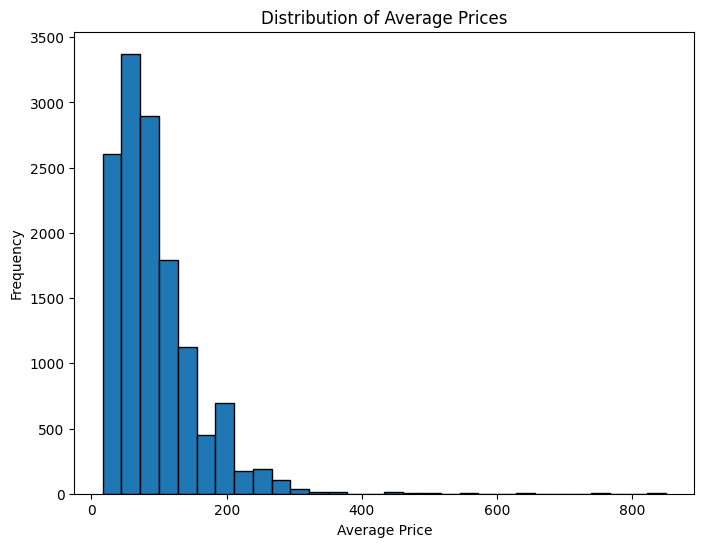

In [59]:
average_skewness = df['Average'].skew()
print(f'Skewness of Average Price: {average_skewness}')

# Plot the distribution of 'Average' prices
plt.figure(figsize=(8, 6))
plt.hist(df['Average'], bins=30, edgecolor='black')
plt.title('Distribution of Average Prices')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()

In [60]:
df['log_average'] = np.log1p(df['Average'])

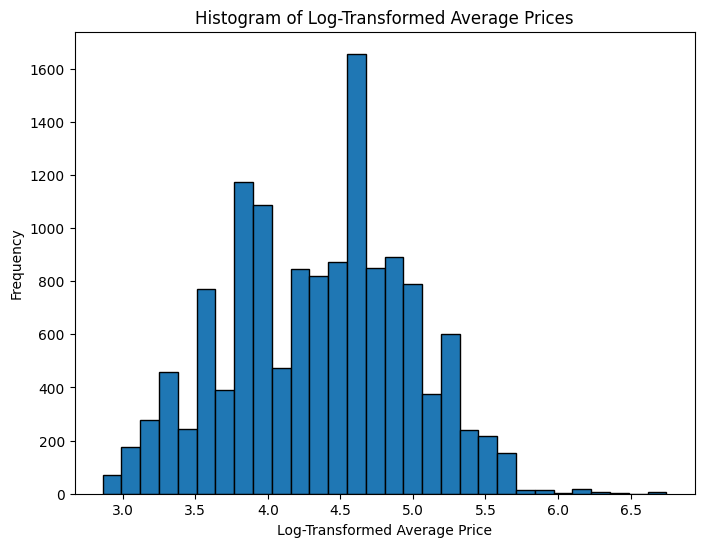

In [61]:
plt.figure(figsize=(8, 6))
plt.hist(df['log_average'], bins=30, edgecolor='black')
plt.title('Histogram of Log-Transformed Average Prices')
plt.xlabel('Log-Transformed Average Price')
plt.ylabel('Frequency')
plt.show()

In [62]:
df.head()


,Commodity,Date,Unit,Minimum,Maximum,Average,day,month,year,Season_Fall,Season_Spring,Season_Summer,Season_Winter,log_average
0,Tomato Big(Nepali),2019-01-01,Kg,45.0,50.0,47.5,1,1,2019,False,False,False,True,3.881564
1,Potato White,2019-01-01,Kg,20.0,25.0,22.5,1,1,2019,False,False,False,True,3.157000
2,Onion Dry (Indian),2019-01-01,Kg,26.0,28.0,27.0,1,1,2019,False,False,False,True,3.332205
3,Carrot(Local),2019-01-01,Kg,55.0,60.0,57.5,1,1,2019,False,False,False,True,4.069027
4,Lettuce,2019-01-01,Kg,90.0,100.0,95.0,1,1,2019,False,False,False,True,4.564348


In [64]:
X = df[['Minimum', 'Maximum', 'day', 'month', 'year', 'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter' , 'log_average']]  # Features
y = df['Average']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
model = LinearRegression()

In [66]:
model.fit(X_train, y_train)

LinearRegression()

In [67]:
y_pred = model.predict(X_test)

In [68]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.29125431491706993
R-squared Score: 0.9999236019293738


In [69]:
grouped = df.groupby('Commodity')

# Initialize lists to store predicted prices and commodities
predicted_prices = []
commodities = []

# Iterate through each commodity group and make predictions for the next day
for commodity, data in grouped:
    # Get the last date for the commodity within 'df'
    last_date = df[df['Commodity'] == commodity]['Date'].max()
    
    # Create a DataFrame for the next day for the commodity
    next_date = last_date + timedelta(days=1)
    next_day_data = pd.DataFrame({'Date': [next_date]})
    
    # Extract relevant features for the commodity for the next day
    next_day_data[['Minimum', 'Maximum', 'day', 'month', 'year', 'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter', 'log_average']] = df[df['Commodity'] == commodity][['Minimum', 'Maximum', 'day', 'month', 'year', 'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter', 'log_average']].iloc[-1]
    
    # Use the trained model to predict the price for the next day for the commodity
    X_next_day = next_day_data[['Minimum', 'Maximum', 'day', 'month', 'year', 'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter', 'log_average']]
    predicted_price_next_day = model.predict(X_next_day)
    
    # Append the predicted average price and commodity to the lists
    predicted_prices.append(predicted_price_next_day[0])
    commodities.append(commodity)

# Create a DataFrame from the predicted prices and commodities for the next day
predicted_prices_df = pd.DataFrame({'Commodity': commodities, 'Predicted_Average_Next_Day': predicted_prices})

# Display the predicted average prices for the next day for all commodities
print(predicted_prices_df)

            Commodity  Predicted_Average_Next_Day
0       Apple(Jholey)                  290.386329
1              Banana                  155.430938
2       Carrot(Local)                  130.363547
3     Cucumber(Local)                   65.343530
4   Garlic Dry Nepali                  255.439214
5             Lettuce                   95.391622
6  Onion Dry (Indian)                   72.383315
7        Potato White                   47.336269
8  Tomato Big(Nepali)                   50.306154


C:\Users\nirvi\AppData\Local\Temp\ipykernel_23020\1071021210.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  next_day_data[['Minimum', 'Maximum', 'day', 'month', 'year', 'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter', 'log_average']] = df[df['Commodity'] == commodity][['Minimum', 'Maximum', 'day', 'month', 'year', 'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter', 'log_average']].iloc[-1]
C:\Users\nirvi\AppData\Local\Temp\ipykernel_23020\1071021210.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  next_day_data[['Minimum', 'Maximum', 'day', 'month', 'year', 'Season_Fall', 'Sea

In [72]:
import pandas as pd

# Read the new dataset ('onion.csv') into a DataFrame
new_data = pd.read_csv('onion.csv')  # Replace 'onion.csv' with your file path

# Convert 'Date' column to datetime if it's not already in datetime format
new_data['Date'] = pd.to_datetime(new_data['Date'])

# Extract features from the date
new_data['day'] = new_data['Date'].dt.day
new_data['month'] = new_data['Date'].dt.month
new_data['year'] = new_data['Date'].dt.year


In [73]:
new_data['Season'] = pd.Categorical(new_data['Season'])

# Create one-hot encoded columns
season_dummies = pd.get_dummies(new_data['Season'], prefix='Season')

# Concatenate the one-hot encoded columns with the original DataFrame
new_data = pd.concat([new_data, season_dummies], axis=1)

# Drop the original 'season' column if needed
new_data.drop('Season', axis=1, inplace=True)

# Display the updated DataFrame
print(new_data.head())

            Commodity       Date Unit  Minimum  Maximum  Average  day  month  \
0  Onion Dry (Indian) 2013-06-16   Kg     28.0     30.0     29.0   16      6   
1  Onion Dry (Indian) 2013-06-17   Kg     29.0     30.0     29.5   17      6   
2  Onion Dry (Indian) 2013-06-18   Kg     33.0     35.0     34.0   18      6   
3  Onion Dry (Indian) 2013-06-19   Kg     34.0     35.0     34.5   19      6   
4  Onion Dry (Indian) 2013-06-20   Kg     35.0     36.0     35.5   20      6   

   year  Season_Fall  Season_Spring  Season_Summer  Season_Winter  
0  2013        False          False           True          False  
1  2013        False          False           True          False  
2  2013        False          False           True          False  
3  2013        False          False           True          False  
4  2013        False          False           True          False  


In [74]:
new_data['log_average'] = new_data.log1p(df['Average'])

AttributeError: 'DataFrame' object has no attribute 'log1p'

In [56]:
X_new = new_data[['Minimum', 'Maximum', 'day', 'month', 'year', 'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter']]

# Use the trained model to predict prices for the new dataset
predicted_prices_new_data = model.predict(X_new)

# Add the predicted prices to the new dataset
new_data['Predicted_Average'] = predicted_prices_new_data

# Display the new dataset with predicted prices
print(new_data)

               Commodity       Date Unit  Minimum  Maximum  Average  day  \
0     Onion Dry (Indian) 2013-06-16   Kg     28.0     30.0    29.00   16   
1     Onion Dry (Indian) 2013-06-17   Kg     29.0     30.0    29.50   17   
2     Onion Dry (Indian) 2013-06-18   Kg     33.0     35.0    34.00   18   
3     Onion Dry (Indian) 2013-06-19   Kg     34.0     35.0    34.50   19   
4     Onion Dry (Indian) 2013-06-20   Kg     35.0     36.0    35.50   20   
...                  ...        ...  ...      ...      ...      ...  ...   
3577  Onion Dry (Indian) 2023-09-24   KG     64.0     70.0    66.33   24   
3578  Onion Dry (Indian) 2023-09-25   KG     68.0     70.0    69.20   25   
3579  Onion Dry (Indian) 2023-09-26   KG     68.0     70.0    69.20   26   
3580  Onion Dry (Indian) 2023-09-27   KG     70.0     74.0    71.20   27   
3581  Onion Dry (Indian) 2023-09-28   KG     70.0     74.0    71.60   28   

      month  year  Season_Fall  Season_Spring  Season_Summer  Season_Winter  \
0       

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming 'df' is your DataFrame containing the dataset with features and target variable

# Define features and target variable
X = df[['Minimum', 'Maximum', 'day', 'month', 'year', 'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter' , 'log_average']]  # Features
y = df['Average']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters like 'n_estimators'

# Train the model
random_forest.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [77]:
y_pred = random_forest.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r_squared}")

Mean Squared Error: 0.2671488830370367
R-squared Score: 0.9999299249549667


In [79]:
grouped = df.groupby('Commodity')

# Initialize lists to store predicted prices and commodities
predicted_prices = []
commodities = []

# Iterate through each commodity group and make predictions for the next day
for commodity, data in grouped:
    # Get the last date for the commodity within 'df'
    last_date = df[df['Commodity'] == commodity]['Date'].max()
    
    # Create a DataFrame for the next day for the commodity
    next_date = last_date + pd.Timedelta(days=1)
    next_day_data = pd.DataFrame({'Date': [next_date]})
    
    # Extract relevant features for the commodity for the next day
    last_row_idx = df[df['Commodity'] == commodity]['Date'].idxmax()
    features = ['Minimum', 'Maximum', 'day', 'month', 'year', 'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter', 'log_average']
    next_day_data[features] = df.loc[last_row_idx, features]
    
    # Use the trained model to predict the price for the next day for the commodity
    X_next_day = next_day_data[['Minimum', 'Maximum', 'day', 'month', 'year', 'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter', 'log_average']]
    predicted_price_next_day = random_forest.predict(X_next_day)
    
    # Append the predicted average price and commodity to the lists
    predicted_prices.append(predicted_price_next_day[0])
    commodities.append(commodity)

# Create a DataFrame from the predicted prices and commodities for the next day
predicted_prices_df = pd.DataFrame({'Commodity': commodities, 'Predicted_Average_Next_Day': predicted_prices})

# Display the predicted average prices for the next day for all commodities
print(predicted_prices_df)


C:\Users\nirvi\AppData\Local\Temp\ipykernel_23020\648161855.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  next_day_data[features] = df.loc[last_row_idx, features]
C:\Users\nirvi\AppData\Local\Temp\ipykernel_23020\648161855.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  next_day_data[features] = df.loc[last_row_idx, features]
C:\Users\nirvi\AppData\Local\Temp\ipykernel_23020\648161855.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `

            Commodity  Predicted_Average_Next_Day
0       Apple(Jholey)                    289.9333
1              Banana                    156.6700
2       Carrot(Local)                    125.0000
3     Cucumber(Local)                     65.0000
4   Garlic Dry Nepali                    256.6700
5             Lettuce                     96.6700
6  Onion Dry (Indian)                     71.8220
7        Potato White                     47.0000
8  Tomato Big(Nepali)                     50.0000


C:\Users\nirvi\AppData\Local\Temp\ipykernel_23020\648161855.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  next_day_data[features] = df.loc[last_row_idx, features]
C:\Users\nirvi\AppData\Local\Temp\ipykernel_23020\648161855.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  next_day_data[features] = df.loc[last_row_idx, features]
C:\Users\nirvi\AppData\Local\Temp\ipykernel_23020\648161855.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `

In [81]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are your training and testing data

# Initialize Ridge Regression model
ridge = Ridge(alpha=1.0)  # You can adjust the regularization strength 'alpha'

# Train the model
ridge.fit(X_train, y_train)

# Predict on the test set
y_pred = ridge.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Ridge Regression): {mse}")
r_squared = r2_score(y_test, y_pred)
print(f"R-squared Score: {r_squared}")


Mean Squared Error (Ridge Regression): 0.291253985520718
R-squared Score: 0.9999236020157768


In [83]:
from sklearn.linear_model import Lasso

# Initialize Lasso Regression model
lasso = Lasso(alpha=1.0)  # You can adjust the regularization strength 'alpha'

# Train the model
lasso.fit(X_train, y_train)

# Predict on the test set
y_pred = lasso.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Lasso Regression): {mse}")
r_squared = r2_score(y_test, y_pred)
print(f"R-squared Score: {r_squared}")

Mean Squared Error (Lasso Regression): 0.3193630142758933
R-squared Score: 0.9999162288183542
